<a href="https://colab.research.google.com/github/arindamroy-eng/Pytorch-and-other-ML-Experiments/blob/main/PerceptronPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

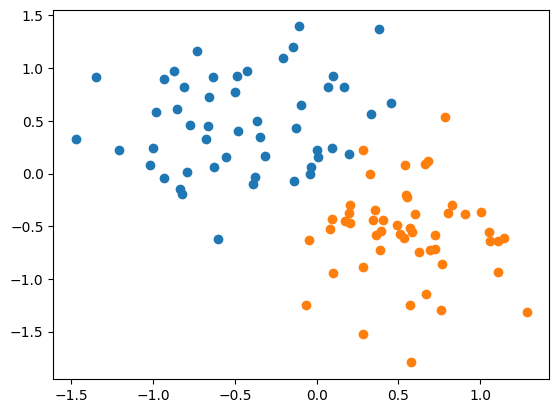

In [ ]:
n_pts = 100
#centers = [[-.5,.5], [.5,-.5], [1,2]]
#centers = 3
centers = [[-.5,.5], [.5,-.5]]
X, labels = datasets.make_blobs(n_samples = n_pts, random_state=123, centers=centers, cluster_std=0.4)
tensor_x = torch.Tensor(X)
tensor_y = torch.Tensor(labels)
def scatter_plot(X, labels):
  plt.scatter(X[labels==0, 0], X[labels==0, 1])
  plt.scatter(X[labels==1, 0], X[labels==1, 1])

scatter_plot(X, labels)


In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [ ]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [ ]:
def get_params(model):
  [w, b] = model.parameters()
  w1, w2 = w.view(2)
  b1 = b[0]
  return (w1.item(), w2.item(), b[0].item())

print(get_params(model))


(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


In [ ]:
def plot_fit(title, model):
  plt.title = title
  w1, w2, b1 =  get_params(model)
  #print(w1, w2, b1)
  x1 = np.array([-2.0, 2])
  #print(x1)
  x2 = (w1*x1 +b1)/-w2
  #print(x2)
  plt.plot(x1,x2,'r')
  scatter_plot(two_d_data, labels)

0.1622033268213272 -0.1682732254266739 0.1939089596271515
[-2.  2.]
[-0.77551074  3.08020252]


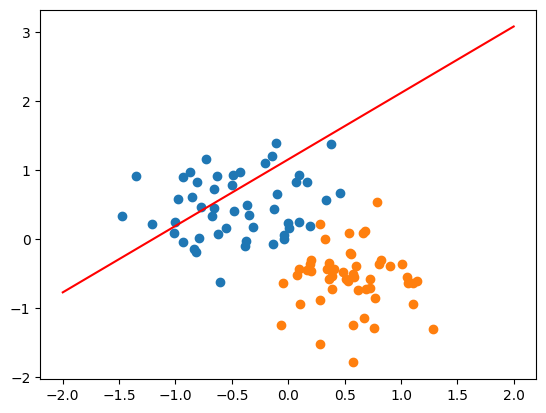

In [ ]:
plot_fit('Initial Model', model)

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

epochs = 1000
x_data = torch.Tensor(X)
y_data = torch.Tensor(labels.reshape(100,1))

losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)

  #if i % 10 == 0:
  #  print (f"Epoch {i}, Loss = {loss.item()}")
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Text(0.5, 0, 'Epochs')

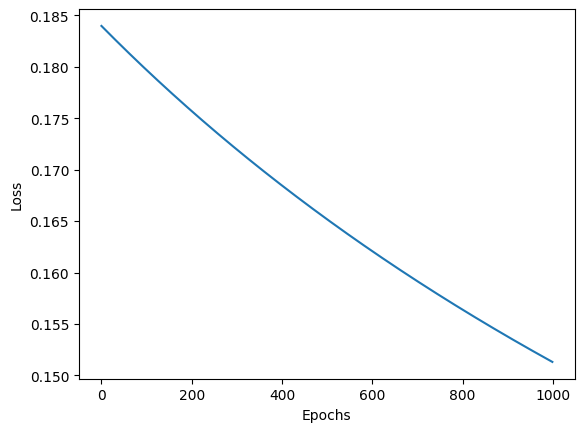

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

2.4796252250671387 -2.3605806827545166 -0.23854376375675201
[-2.  2.]
[-2.20191339  1.99980739]


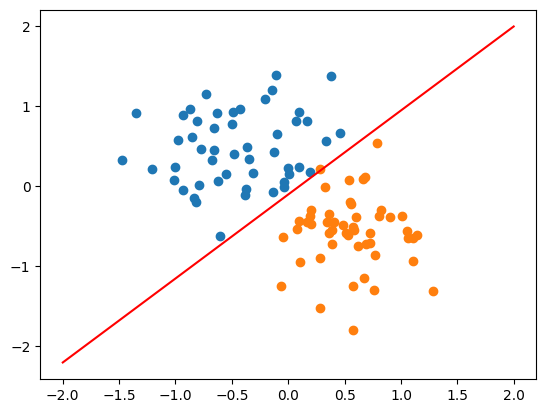

In [ ]:
plot_fit('Trained Model', model)

Red point positive prob = 0.9424158334732056
Black point positive prob = 0.05055497586727142
Red point belongs to class 1
Black point belongs to class 0


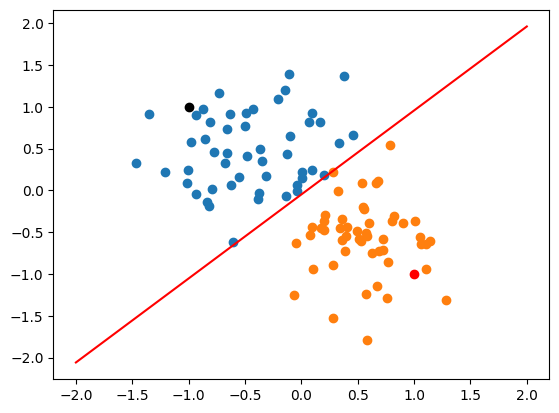

In [ ]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0],point2.numpy()[1], 'ko')

print(f"Red point positive prob = {model.forward(point1).item()}")
print(f"Black point positive prob = {model.forward(point2).item()}")

print(f"Red point belongs to class {model.predict(point1)}")
print(f"Black point belongs to class {model.predict(point2)}")

plot_fit('Trained Model', model)
